# Summer of Code - Artificial Intelligence
## Week 06: Logistic Regression

### Day 05: Evaluating a Classifier

In this notebook, we will explore **Evaluation Metrics for a Classifier** using Python's Scikit-Learn library.


# Introduction to Model Evaluation
In machine learning, training a model is only half the story. The other crucial half is **evaluating** how well your model performs. Without proper evaluation, you might:

- **Overfit** to your training data (model memorizes instead of learning)
- **Underfit** and miss important patterns
- **Deploy a poor model** that fails in real-world scenarios
- **Make wrong decisions** based on misleading metrics


In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-white")

# Applying to MNIST Digit Classification

Now let's apply everything we've learned to a real-world **multiclass classification** problem: MNIST digit recognition.

## MNIST Dataset:
- **Task**: Classify handwritten digits (0-9)
- **Classes**: 10 classes (0, 1, 2, ..., 9)
- **Features**: 64 pixel values (8x8 images)
- **Type**: Multiclass classification

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
type(mnist)

sklearn.utils._bunch.Bunch

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X = mnist.data.values
X.shape

(70000, 784)

In [5]:
type(X)

numpy.ndarray

In [6]:
mnist.frame.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [7]:
y = mnist.target.to_numpy()
y.shape

(70000,)

In [50]:
type(y)

numpy.ndarray

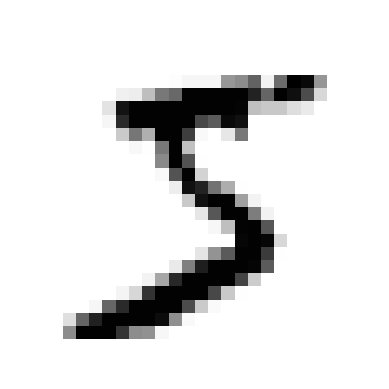

In [8]:
image = X[0].reshape((28, 28))
plt.imshow(image)
plt.axis('off')
plt.show()

In [9]:
np.unique(y, return_counts=True)

(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object),
 array([6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958]))

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((56000, 784), (14000, 784))

In [11]:
y[0]

'5'

In [12]:
y_train_5 = (y_train == '5').astype(np.int8)
y_test_5 = (y_test == '5').astype(np.int8)

np.unique(y_train_5, return_counts=True)

(array([0, 1], dtype=int8), array([50960,  5040]))

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train_5)

RandomForestClassifier()

In [14]:
rf_model.score(X_train, y_train_5) # same as accuracy

1.0

In [15]:
from sklearn.metrics import accuracy_score

y_pred_5 = rf_model.predict(X_test)

accuracy_score(y_test_5, y_pred_5)

0.9883571428571428

# Cross-Validation

## What is Cross-Validation?

**Cross-validation** is a technique used to assess how well a model will generalize to an independent dataset. It's crucial because:

1. **Prevents Overfitting**: Helps detect if your model is memorizing training data
2. **Better Performance Estimate**: Provides a more robust estimate of model performance
3. **Model Selection**: Helps choose the best model among different options
4. **Hyperparameter Tuning**: Essential for finding optimal parameters

## Types of Cross-Validation:

### Hold-out Validation
- Split data into train/test sets
- Simple but can be unreliable with small datasets

### K-Fold Cross-Validation
- Split data into k folds (usually k=5 or k=10)
- Train on k-1 folds, test on remaining fold
- Repeat k times, average the results


<img src="kfolds.png" alt="K-Fold Cross Validation" width="500">

### Stratified K-Fold Cross-Validation
- Same as K-Fold but maintains class distribution in each fold
- Better for imbalanced datasets

In [71]:
from sklearn.model_selection import cross_val_score, cross_val_predict

y_5 = (y == "5").astype(np.int8)

scores = cross_val_score(rf_model, X, y, cv=5, scoring="accuracy")

In [72]:
scores

array([0.9685    , 0.967     , 0.966     , 0.96535714, 0.97242857])

# Performance Metrics

Now that we understand cross-validation, let's dive deep into different performance metrics.

**Accuracy alone is often not enough!**


In [16]:
y_pred_5_dummy = np.zeros_like(y_test_5)


accuracy_score(y_test_5, y_pred_5_dummy)

0.9090714285714285

## The Confusion Matrix - Foundation of All Metrics

Before we understand other metrics, we need to understand the **Confusion Matrix**:


<img src="cm.png" alt="Confusion Matrix" width="800">

|                | Predicted Negative | Predicted Positive |
|----------------|--------------------|--------------------|
| Actual Negative| TN                 | FP                 |
| Actual Positive| FN                 | TP                 |



Where:
- **TP (True Positive)**: Correctly predicted positive
- **TN (True Negative)**: Correctly predicted negative
- **FN (False Negative)**: Incorrectly predicted negative
- **FP (False Positive)**: Incorrectly predicted positive


In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_5, y_pred_5)
cm

array([[12719,     8],
       [  155,  1118]])

In [18]:
np.unique(y_test_5, return_counts=True)

(array([0, 1], dtype=int8), array([12727,  1273]))

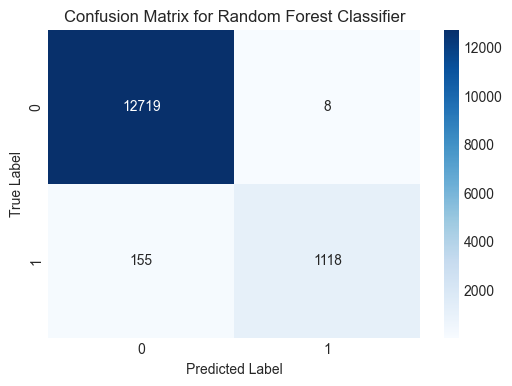

In [19]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()



## Key Metrics Explained:

### Accuracy = $$\frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}$$
- **What it measures**: Overall correctness
- **When to use**: Balanced datasets, equal cost of errors
- **Limitation**: Misleading with imbalanced data

### Precision = $$\frac{\text{TP}}{\text{TP} + \text{FP}}$$
- **What it measures**: Of all positive predictions, how many were correct?
- **When to use**: When false positives are costly (e.g., spam detection)
- **Interpretation**: "How precise are our positive predictions?"

### Recall (Sensitivity) = $$\frac{\text{TP}}{\text{TP} + \text{FN}}$$
- **What it measures**: Of all actual positives, how many did we catch?
- **When to use**: When false negatives are costly (e.g., medical diagnosis)
- **Interpretation**: "How well do we catch all positive cases?"

### F1-Score = $$\frac{2 \times (\text{Precision} \times \text{Recall})}{\text{Precision} + \text{Recall}}$$
- **What it measures**: Harmonic mean of precision and recall
- **When to use**: When you need a balance between precision and recall
- **Interpretation**: Single metric that balances both concerns

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

prec = precision_score(y_test_5, y_pred_5)
rec = recall_score(y_test_5, y_pred_5)
f1 = f1_score(y_test_5, y_pred_5)

print(f'Precision: {prec:.4f}')
print(f'Recall: {rec:.4f}')
print(f'F1 Score: {f1:.4f}')

Precision: 0.9929
Recall: 0.8782
F1 Score: 0.9321


In [23]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train_5)

c:\Users\DIPLAB\.conda\envs\ul-env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [24]:
y_pred_5_lr = lr_model.predict(X_test)

prec = precision_score(y_test_5, y_pred_5_lr)
rec = recall_score(y_test_5, y_pred_5_lr)
f1 = f1_score(y_test_5, y_pred_5_lr)

print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.8919
Recall: 0.8170
F1 Score: 0.8528


# Precision-Recall Tradeoff

## Understanding the Tradeoff

In classification, there's often a **tradeoff** between Precision and Recall:

- **Higher threshold**: Higher Precision, Lower Recall (fewer positives predicted)
- **Lower threshold**: Lower Precision, Higher Recall (more positives predicted)


<img src="prec-rec.png" alt="Precision-Recall Tradeoff" width="800">

## Real-World Examples:

#### Medical Diagnosis (Favor Recall):
- Missing a disease (False Negative) can be fatal
- Better to have some false alarms (False Positives) than miss actual cases
- **Solution**: Lower threshold to catch more positive cases

### Spam Detection (Favor Precision):
- Marking important email as spam (False Positive) is very bad
- Missing some spam (False Negative) is tolerable
- **Solution**: Higher threshold to be more certain before marking as spam

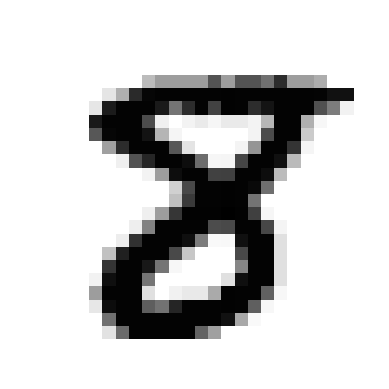

In [26]:
some_digit = X_test[0].reshape(28, 28)
plt.imshow(some_digit,)
plt.axis('off')
plt.show()


In [28]:
y_test_5[0]

np.int8(0)

In [34]:
lr_model.predict(some_digit.reshape(1, -1))

array([0], dtype=int8)

In [ ]:
from sklearn.metrics import precision_recall_curve

y_scores_5 = rf_model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test_5, y_scores_5)

print(f"Precisions Shape: {precisions.shape}")
print(f"Recalls Shape: {recalls.shape}")
print(f"Thresholds Shape: {thresholds.shape}")

Precisions Shape: (102,)
Recalls Shape: (102,)
Thresholds Shape: (101,)


In [51]:
y_scores_5_lr = lr_model.predict_proba(X_test)[:, 1]
precisions_lr, recalls_lr, thresholds_lr = precision_recall_curve(y_test_5, y_scores_5_lr)

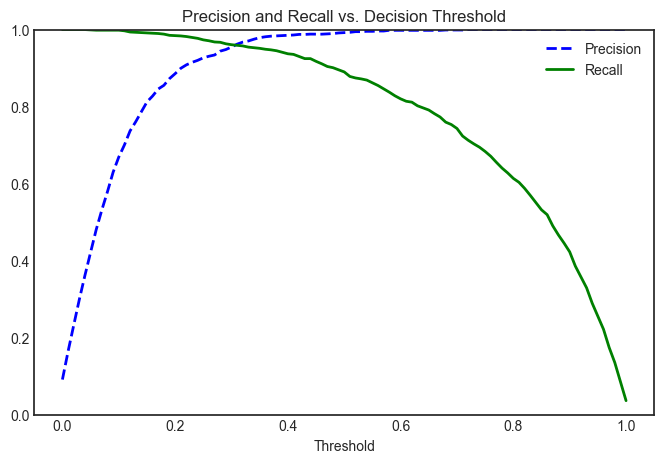

In [55]:
# plot precision and recall vs thresholds
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)

# plt.plot(thresholds_lr, precisions_lr[:-1], label="Precision (Logistic Regression)", linewidth=2)
# plt.plot(thresholds_lr, recalls_lr[:-1], label="Recall (Logistic Regression)", linewidth=2)

plt.xlabel("Threshold")
plt.legend(loc="best")
plt.ylim([0, 1])
plt.title("Precision and Recall vs. Decision Threshold")
plt.show()

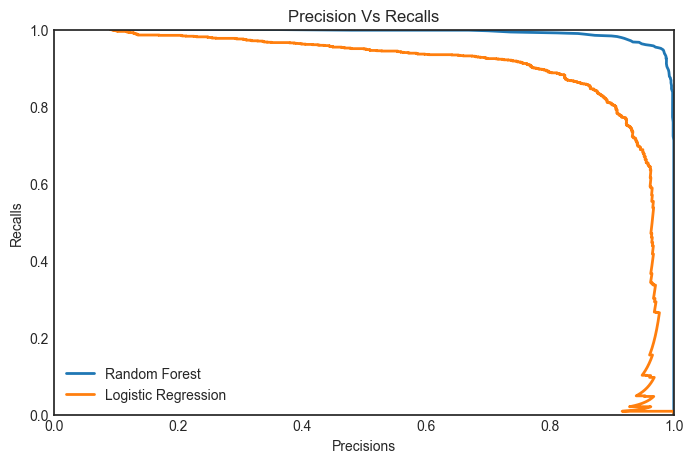

In [52]:
# plot precision vs recall
plt.figure(figsize=(8, 5))
plt.plot(precisions, recalls, label="Random Forest", linewidth=2)
plt.plot(precisions_lr, recalls_lr, label="Logistic Regression", linewidth=2)
plt.xlabel("Precisions")
plt.ylabel("Recalls")
plt.ylim([0, 1])
plt.xlim([0, 1])
plt.legend(loc="best")
plt.title("Precision Vs Recalls")
plt.show()

# ROC Curve and AUC

## What is ROC-AUC?

**ROC (Receiver Operating Characteristic)** curve and **AUC (Area Under the Curve)** are powerful tools for evaluating binary classifiers.

### ROC Curve:
- **X-axis**: False Positive Rate (FPR) = FP / (FP + TN)
- **Y-axis**: True Positive Rate (TPR) = TP / (TP + FN) = Recall
- Shows the tradeoff between sensitivity and specificity at different thresholds

### AUC (Area Under the Curve):
- **Range**: 0 to 1 (higher is better)



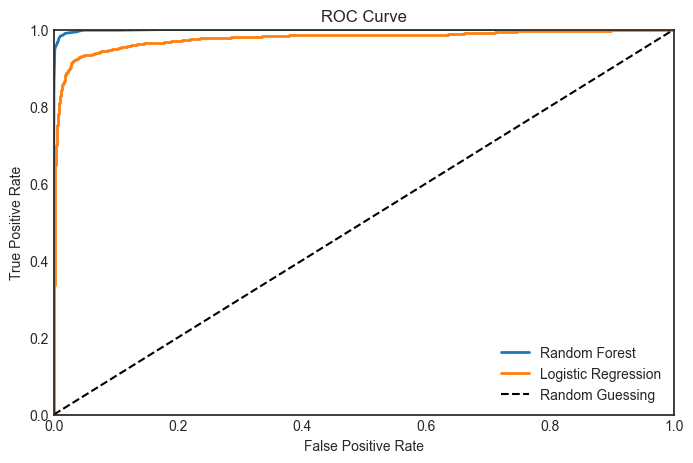

In [56]:
from sklearn.metrics import roc_curve, roc_auc_score

y_scores_5 = rf_model.predict_proba(X_test)[:, 1]
y_scores_5_lr = lr_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_5, y_scores_5)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test_5, y_scores_5_lr)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label="Random Forest", linewidth=2)
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.ylim([0, 1])
plt.xlim([0, 1])
plt.legend(loc="best")
plt.title("ROC Curve")
plt.show()

In [57]:
auc = roc_auc_score(y_test_5, y_scores_5)
auc_lr = roc_auc_score(y_test_5, y_scores_5_lr)

print(f"Random Forest AUC: {auc:.4f}")
print(f"Logistic Regression AUC: {auc_lr:.4f}")

Random Forest AUC: 0.9991
Logistic Regression AUC: 0.9767


In [59]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [60]:
rf_model.predict(some_digit.reshape(1, -1))

array(['8'], dtype=object)

In [61]:
y_pred = rf_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9669
Precision: 0.9670
Recall: 0.9669
F1 Score: 0.9669


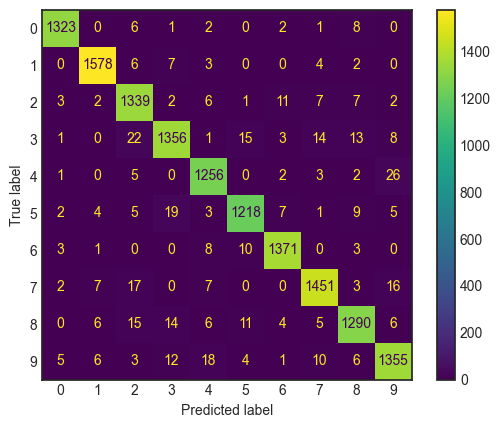

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
)
plt.show()

In [73]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.98      0.99      0.99      1600
           2       0.94      0.97      0.96      1380
           3       0.96      0.95      0.95      1433
           4       0.96      0.97      0.96      1295
           5       0.97      0.96      0.96      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.96      0.95      0.96      1357
           9       0.96      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



# Multilabel Classification